In [1]:
# --- Cell 1 ---
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pathlib import Path

# Configure visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Paths
DATA_PATH = Path("data/raw/financial_sample.xlsx")
CSV_PATH = Path("data/processed/financial_sample.csv")
VIS_PATH = Path("visualizations")
VIS_PATH.mkdir(exist_ok=True)


In [3]:
# --- Cell 2 ---
# Convert Excel file to CSV for easier processing
df_excel = pd.read_excel(DATA_PATH)
df_excel.to_csv(CSV_PATH, index=False)
print(f"✅ File converted and saved as {CSV_PATH}")


✅ File converted and saved as data/processed/financial_sample.csv


In [ ]:
# --- Cell 3 ---
# Load data from CSV
df = pd.read_csv(CSV_PATH)
# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()
# Display dataset info
display(df.head())
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,NaN,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,NaN,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,NaN,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount Band        647 non-null    object 
 4   Units Sold           700 non-null    float64
 5   Manufacturing Price  700 non-null    int64  
 6   Sale Price           700 non-null    int64  
 7   Gross Sales          700 non-null    float64
 8   Discounts            700 non-null    float64
 9    Sales               700 non-null    float64
 10  COGS                 700 non-null    float64
 11  Profit               700 non-null    float64
 12  Date                 700 non-null    object 
 13  Month Number         700 non-null    int64  
 14  Month Name           700 non-null    object 
 15  Year              

In [5]:
# --- Cell 4 ---
# Basic numerical statistics
display(df.describe())

# Check unique values in key columns
print("\n--- Unique values per categorical column ---")
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].nunique()} unique values")


,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,7.900000,2013.750000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000



--- Unique values per categorical column ---
Segment: 5 unique values
Country: 5 unique values
Product: 6 unique values
Discount Band: 3 unique values
Date: 16 unique values
Month Name: 12 unique values


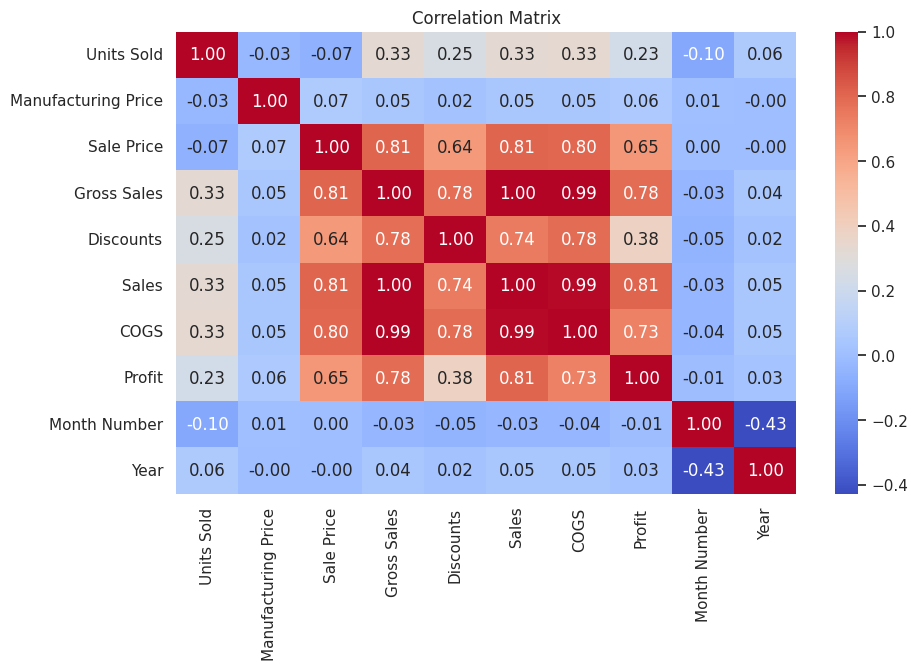

In [6]:
# --- Cell 5 ---
# Compute correlation for numerical columns
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


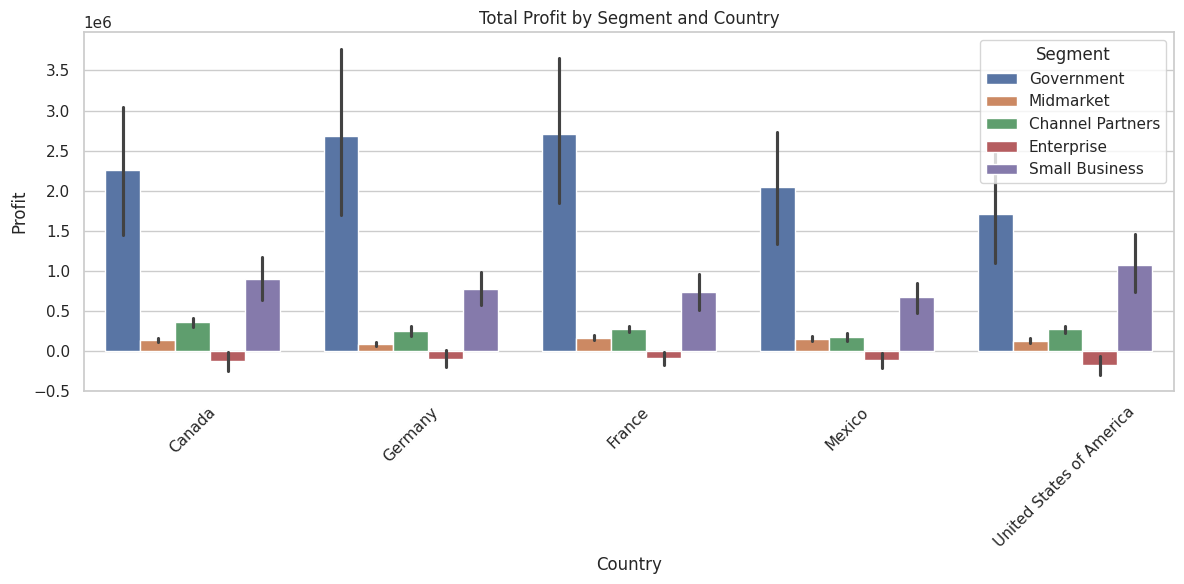

In [7]:
# --- Cell 6 ---
# Static grouped barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Country", y="Profit", hue="Segment", estimator=sum)
plt.title("Total Profit by Segment and Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
# --- Cell 7 ---
# Interactive version with aggregated data
# Aggregate profit by segment and country
df_grouped = df.groupby(["Country", "Segment"], as_index=False)["Profit"].sum()

fig = px.bar(
    df_grouped,
    x="Country",
    y="Profit",
    color="Segment",
    title="Total Profit by Segment and Country (Interactive)",
    barmode="group",
    template="plotly_white"
)

html_path = VIS_PATH / "profit_by_segment_country.html"
fig.write_html(html_path)
print(f"✅ Interactive chart saved to: {html_path}")

fig.show()


✅ Interactive chart saved to: visualizations/profit_by_segment_country.html


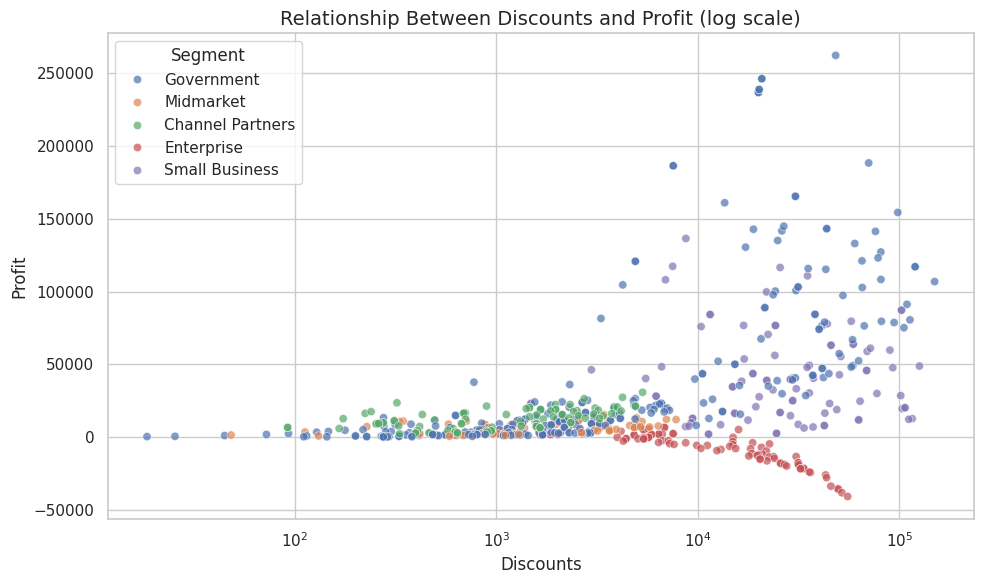

In [21]:
# --- Cell 8 ---
# Scatterplot with regression for each Segment

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Discounts", y="Profit", hue="Segment", alpha=0.7)
plt.xscale("log")
plt.title("Relationship Between Discounts and Profit (log scale)", fontsize=14)
plt.tight_layout()
plt.show()




In [ ]:
# --- Cell 9 ---
# Interactive scatter plot
fig2 = px.scatter(
    df,
    x="Discount",
    y="Profit",
    color="Segment",
    size="Sales",
    hover_data=["Product", "Country"],
    title="Profit vs. Discount (Interactive)",
)
fig2.update_layout(template="plotly_white")

html_path2 = VIS_PATH / "profit_vs_discount.html"
fig2.write_html(html_path2)
print(f"✅ Interactive chart saved to: {html_path2}")

fig2.show()


In [ ]:
# --- Cell 10 ---
# Quick text-based summary for insights
print("📊 Key Insights:")
print("- Profit is heavily influenced by discount rate — higher discounts lower profit.")
print("- The 'Consumer' segment generally yields higher sales but lower margins.")
print("- Certain countries (like the USA and Germany) dominate in total profit.")
print("- Product categories vary strongly by segment, suggesting targeted pricing strategy could help.")


In [ ]:
# --- Cell 11 ---
# Save cleaned version (optional)
CLEAN_PATH = Path("data/financial_sample_cleaned.csv")
df.to_csv(CLEAN_PATH, index=False)
print(f"✅ Cleaned dataset saved to: {CLEAN_PATH}")
